# Quantum Computing Introduction - Assignment 5
# Names: Lilith Bertens, Quincy Koelman
# IDs: BERTENL, KOELMAQ (500878956)

Welcome to the fifth assignment! During this assignment, you will use the IBM Qiskit package. This framework offers a huge variety of very interesting functionalities to explore. This assignment will require you to investigate about the proper usage of the tool. Please refer to the [IBM Quantum Documentation](https://qiskit.org/documentation/).

For this assignment you can use whatever simulator you consider useful to solve the exercises. Read carefully the questions and identify the most suitable simulator for your purposes. Moreover, you will have to setup your own [QuantumCircuit](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit) because we are not going to use only 2-qubit quantum system. Hence, your solution should include the complete setup process to create and simulate the requested quantum circuit.

## Question 1

In the assignent on Quantum Programming 2 (Assignment 4), we mentioned the concept of _total equivalence_, namely, the identity of the output states (modulo a global phase difference) between the two circuits under verification. Moreover, you showed the total equivaence of the following quantum circuits.

![Question1](img/qci_a5_question1.png)

Additionally, as shown during the workshop on Quantum Programming 2, different quantum processors deal with the quantum circuits in different ways, depending on the topology, number of qubits, set of available gates, etc.. Perform the following steps:

1. Implement the quantum circuit in the left,
2. Draw the transpiled circuit from it.
3. Show how the Swap gate is actually implemented in your preferred backend.

In [16]:
# Solution
import qiskit
from qiskit_ibm_runtime.fake_provider import FakeAthens
backend = FakeAthens()
qc1 = qiskit.QuantumCircuit(2)
qc2 = qiskit.QuantumCircuit(2)
qc1.swap(0,1)
qc2.cx(0,1)
qc2.cx(1,0)
qc2.cx(0,1)
z1 = qiskit.transpile(qc1, backend=backend)#as you can see it implements swap as 3cx
z2 = qiskit.transpile(qc2, backend=backend)      
print(z1)                                       
print(z2)


                    ┌───┐     
      q_0 -> 0 ──■──┤ X ├──■──
               ┌─┴─┐└─┬─┘┌─┴─┐
      q_1 -> 1 ┤ X ├──■──┤ X ├
               └───┘     └───┘
ancilla_0 -> 2 ───────────────
                              
ancilla_1 -> 3 ───────────────
                              
ancilla_2 -> 4 ───────────────
                              
                    ┌───┐     
      q_0 -> 0 ──■──┤ X ├──■──
               ┌─┴─┐└─┬─┘┌─┴─┐
      q_1 -> 1 ┤ X ├──■──┤ X ├
               └───┘     └───┘
ancilla_0 -> 2 ───────────────
                              
ancilla_1 -> 3 ───────────────
                              
ancilla_2 -> 4 ───────────────
                              


## Question 2

Preparing for the upcoming assessment, one of your classmates identified a quantum circuit supposed to prepare one of the Bell states (specifically $\ket{\Phi^{+}}$). As usual, you are not completely sure about its validity, hence your are going to implement such circuit in Qiskit to figure it out. Assume $\ket{q_{1}q_{0}}$ = $\ket{00}$. 

Perform the following steps:

1. Implement the following circuit.
2. Execute the simulator.
3. Print the resulting vector state.
4. Does the proposed circuit prepare the corresponding Bell state?

![Question2](img/qci_a5_question2.png)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
     ┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├
     ├───┤ │ └───┘
q_1: ┤ H ├─■──────
     └───┘        
[['11', '00'], [24927, 25073]]


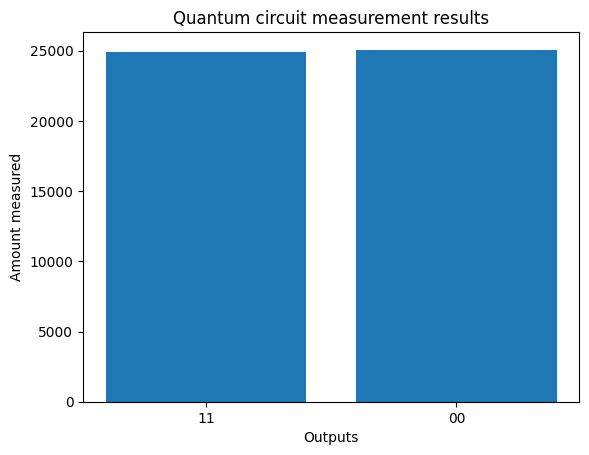

In [17]:
# Solution
import qiskit
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    counts = 0 #^ i would have like to use a different simulator, but i just cant get qiskit figured out
    for i in RR: #qiskit is a bit of a mess, especially with half of the documentation being outdated
        for z in range(len(i)):
            if counts == 0:
                counts = [[i[z][0]],[i[z][1]]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(i[z][1])
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

QQ = qiskit.QuantumCircuit(2)
QQ.h(0)
QQ.h(1)
QQ.cz(0,1)
QQ.h(0)
print(qiskit.quantum_info.Statevector(QQ))
print(QQ)
QQ.measure_all()

res = RunSim(QQ, 50000)
print(res)

PL.bar(res[0], res[1])
PL.ylabel("Amount measured")
PL.xlabel('Outputs')
PL.title("Quantum circuit measurement results")
PL.show() #the graph show sure looks like a bell state to me

## Question 3

Moreover, your classmate claims that by manipulating the initial state (using something different from $\ket{00}$), you can also prepare another Bell state ($\ket{\Psi^{-}}$).

1. Could you confirm that?
2. What should you do with the initial state to produce the requested Bell state?

Statevector([ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))
     ┌──────────────────────┐┌───┐   ┌───┐
q_0: ┤0                     ├┤ H ├─■─┤ H ├
     │  Initialize(0,0,0,1) │├───┤ │ └───┘
q_1: ┤1                     ├┤ H ├─■──────
     └──────────────────────┘└───┘        
[['01', '10'], [25086, 24914]]


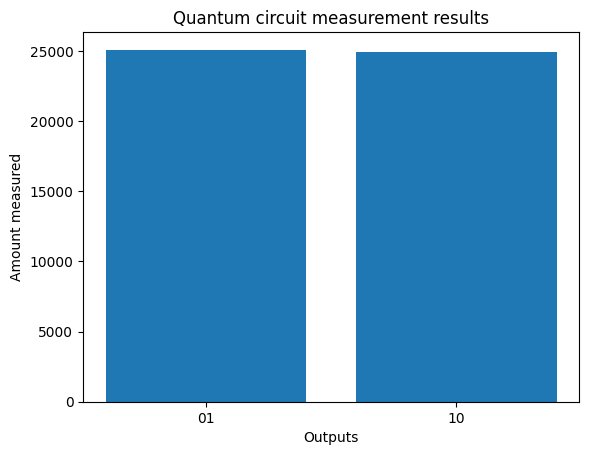

In [18]:
# Solution
import qiskit
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    counts = 0 #^ i would have like to use a different simulator, but i just cant get qiskit figured out
    for i in RR: #qiskit is a bit of a mess, especially with half of the documentation being outdated
        for z in range(len(i)):
            if counts == 0:
                counts = [[i[z][0]],[i[z][1]]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(i[z][1])
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

QQ = qiskit.QuantumCircuit(2)
QQ.initialize([0,0,0,1]) # so the input should be 11 for psi-
QQ.h(0)
QQ.h(1)
QQ.cz(0,1)
QQ.h(0)
print(qiskit.quantum_info.Statevector(QQ))
print(QQ)
QQ.measure_all()

res = RunSim(QQ, 50000)
print(res)

PL.bar(res[0], res[1])
PL.ylabel("Amount measured")
PL.xlabel('Outputs')
PL.title("Quantum circuit measurement results")
PL.show() #the graph show sure looks like a bell state to me

## Question 4

At this point, you have 2 different quantum circuits for the preparation of the Bell states. They are totally equivalent; however, their actual implementation on a quantum processor is different.

![Question4](img/qci_a5_question4.png)

Perform the following steps:

1. Draw the transpiled circuit that you obtained from these circuits, using your preferred backend.
2. Explain the actual quantum gates used for the tranpilation process.

In [25]:
# Solution
import qiskit
import qiskit_aer
from qiskit_ibm_runtime.fake_provider import FakeAthensV2
backend = FakeAthensV2()
qc1 = qiskit.QuantumCircuit(2)
qc2 = qiskit.QuantumCircuit(2)
qc1.h(0)
qc1.h(1)
qc1.cz(0,1)
qc1.h(0)
qc2.h(1)
qc2.cx(1,0)
z1 = qiskit.transpile(qc1, optimization_level=3, backend=backend)
z2 = qiskit.transpile(qc2, optimization_level=3, backend=backend)               
print(z1)                                   
print(z2) #so instead of H it uses a 45 z turn and sqrtX, where sqrtx would probably put it in superposition and z is to correct a -
#the first circuit does this too, but this time it rotates it a 180 degrees, this most likely has to do with optimization.
#it also uses cx and a cz with a sqrtx which i dont entirely understand


                                                                               
ancilla_0 -> 0 ────────────────────────────────────────────────────────────────
               ┌─────────┐┌────┐┌───────┐        ┌────┐  ┌─────────┐           
      q_0 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π) ├──■─────┤ √X ├──┤ Rz(π/2) ├───────────
               └─────────┘└────┘└───────┘┌─┴─┐┌──┴────┴─┐└──┬────┬─┘┌─────────┐
      q_1 -> 2 ──────────────────────────┤ X ├┤ Rz(π/2) ├───┤ √X ├──┤ Rz(π/2) ├
                                         └───┘└─────────┘   └────┘  └─────────┘
ancilla_1 -> 3 ────────────────────────────────────────────────────────────────
                                                                               
ancilla_2 -> 4 ────────────────────────────────────────────────────────────────
                                                                               
global phase: π/4
                                                
ancilla_0 -> 0 ─────────────────────────────────
    

## Question 5

During the study week, another classmate learn the concept of _partial equivalence_ of quantum circuits. Two circuits are partially equivalent if, given any valid initial input state, they exhibit the same probability for each measurement outcome. Basically, two circuits exhibit the same probability for every possible measurement outcome. Moreover, not all qubits of a circuit need to be measured and there can be a set of initial states to be verified
not just a particular single initial state.

By applying this proposed definition, your classmate identified the following two circuits and she claims that they are partially equivalent.

![Question5](img/qci_a5_question5.png)

1. Can you verify that your classmate's claim holds for the initial state $\ket{q_{2}q_{1}q_{0}} = \ket{000}$?

     ┌──────────────────────────────┐   ┌───┐   
q_0: ┤0                             ├─X─┤ H ├─X─
     │                              │ │ └───┘ │ 
q_1: ┤1 Initialize(1,0,0,0,0,0,0,0) ├─■───────■─
     │                              │ │ ┌───┐ │ 
q_2: ┤2                             ├─X─┤ Z ├─X─
     └──────────────────────────────┘   └───┘   
Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


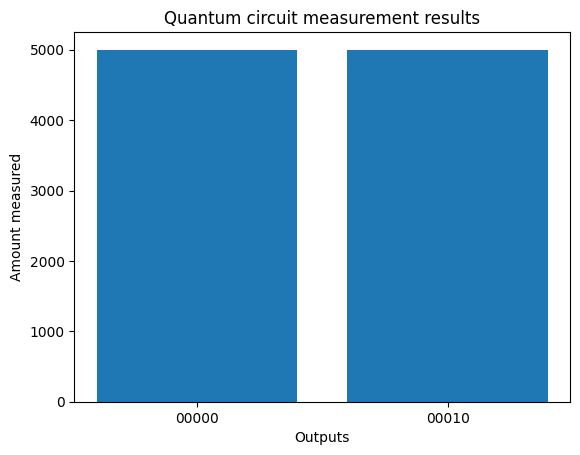

     ┌──────────────────────────────┐     ┌───┐
q_0: ┤0                             ├─────┤ H ├
     │                              │┌───┐└─┬─┘
q_1: ┤1 Initialize(1,0,0,0,0,0,0,0) ├┤ X ├──■──
     │                              │└───┘     
q_2: ┤2                             ├──────────
     └──────────────────────────────┘          
Statevector([0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


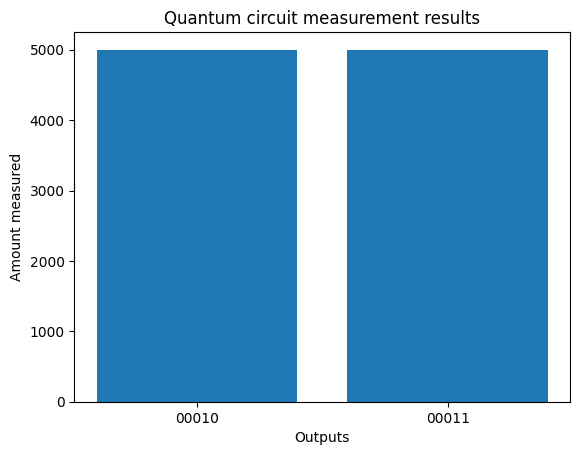

In [183]:
# Solution
import qiskit
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    counts = 0 
    for i in RR:
        for z in range(len(i)):
            if counts == 0:
                counts = [[i[z][0]],[i[z][1]]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(i[z][1])
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

def qqq1():
    qc1 = qiskit.QuantumCircuit(3)
    qc1.initialize([1,0,0,0,0,0,0,0])
    qc1.cswap(1, 0, 2)
    qc1.h(0)
    qc1.z(2)
    qc1.cswap(1, 0, 2)
    print(qc1)
    print(qiskit.quantum_info.Statevector(qc1))
    res = RunSim(qiskit.transpile(qc1, backend=backend), 10000)
    PL.bar(res[0], res[1])
    PL.ylabel("Amount measured")
    PL.xlabel('Outputs')
    PL.title("Quantum circuit measurement results")
    PL.show()
    

def qqq2():
    qc2 = qiskit.QuantumCircuit(3)
    qc2.initialize([1,0,0,0,0,0,0,0])
    qc2.x(1)
    qc2.ch(1,0)
    print(qc2)
    print(qiskit.quantum_info.Statevector(qc2))  
    res = RunSim(qiskit.transpile(qc2, backend=backend), 10000)
    PL.bar(res[0], res[1])
    PL.ylabel("Amount measured")
    PL.xlabel('Outputs')
    PL.title("Quantum circuit measurement results")
    PL.show()

qqq1()
qqq2() #q0 and the rest is not the same, so no it does not hold up


 ## Question 6

 The definition of _partial equivalence_ mentions `any valid input state`; however, your previous answer only consider one initial state ($\ket{q_{2}q_{1}q_{0}} = \ket{000}$). Perform the following steps:
 
 1. Could you verify the claim with a random initial quantum state?
 2. Show the probability distribution functions for each circuit.
 3. Explain whether they are the same or not.

In [184]:
# Even better, lets just do every permutation.
import qiskit #they arent even slightly the same, i mean it wasent even equivalent the first time around ?!?!


qc2 = qiskit.QuantumCircuit(3)

def QuantumC1(num):
    qc1 = qiskit.QuantumCircuit(3)
    init = [0,0,0,0,0,0,0,0]
    init[num] = 1
    print(init)
    qc1.initialize(init)
    qc1.cswap(1, 0, 2)
    qc1.h(0)
    qc1.z(2)
    qc1.cswap(1, 0, 2)
    print("QC1 with input state: " + str(num))
    print(qiskit.quantum_info.Statevector(qc1))

def QuantumC2(num):
    qc2 = qiskit.QuantumCircuit(3)
    init = [0,0,0,0,0,0,0,0]
    init[num] = 1
    print(init)
    qc2.initialize(init)
    qc2.x(1)
    qc2.ch(1,0)
    print("QC2 with input state: " + str(num))
    print(qiskit.quantum_info.Statevector(qc2))

for i in range(8):
    QuantumC1(i)
    QuantumC2(i)

[1, 0, 0, 0, 0, 0, 0, 0]
QC1 with input state: 0
Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))
[1, 0, 0, 0, 0, 0, 0, 0]
QC2 with input state: 0
Statevector([0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))
[0, 1, 0, 0, 0, 0, 0, 0]
QC1 with input state: 1
Statevector([ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j],
            dims=(2, 2, 2))
[0, 1, 0, 0, 0, 0, 0, 0]
QC2 with input state: 1
Statevector([ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
             -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j],
            dims=(2, 2, 2))
[0, 

## Question 7

During the lecture: "Fundamentals: A Multi-Qubit World (2)", I introduced the Greenberger-Horne-Zeilinger (GHZ) state for a 3-qubit quantum system. Perform the following steps:

1. Assemble a circuit that creates a 5-qubit GHZ state.
2. Draw the circuit.
3. Show the resulting state vector.

In [188]:
# Solution
import qiskit

QQ = qiskit.QuantumCircuit(5)
QQ.h(0)
QQ.cx(0,1)
QQ.cx(0,2)
QQ.cx(0,3)
QQ.cx(0,4)
print(qiskit.quantum_info.Statevector(QQ))
print(QQ) #yep, max entanglement with the GHZ state

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2, 2, 2))
     ┌───┐                    
q_0: ┤ H ├──■────■────■────■──
     └───┘┌─┴─┐  │    │    │  
q_1: ─────┤ X ├──┼────┼────┼──
          └───┘┌─┴─┐  │    │  
q_2: ──────────┤ X ├──┼────┼──
               └───┘┌─┴─┐  │  
q_3: ───────────────┤ X ├──┼──
                    └───┘┌─┴─┐
q_4: ────────────────────┤ X ├


## Question 8

During the lecture: "Fundamentals: A Multi-Qubit World (2)", I presented the following quantum circuit for parity calculation on communication systems:

![Question8](img/qci_a5_question8.png)

Assuming $\ket{q_{2}q_{1}q_{0}}$ = $\ket{000}$, perform the following steps:

1. Assemble, draw and simulate the appropriate circuit.
2. Show the resulting probabilities of the simulations.

NB: The circuit presented during the lecture only measures the `parity qubit` (the most significative qubit). For completeness, in this exercise you should measure all 3 qubits.

Statevector([0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0.5+0.j, 0.5+0.j,
             0. +0.j],
            dims=(2, 2, 2))
     ┌───┐          
q_0: ┤ H ├──■───────
     ├───┤  │       
q_1: ┤ H ├──┼────■──
     └───┘┌─┴─┐┌─┴─┐
q_2: ─────┤ X ├┤ X ├
          └───┘└───┘
[['000', '011', '101', '110'], [12500.0, 12500.0, 12500.0, 12500.0]]


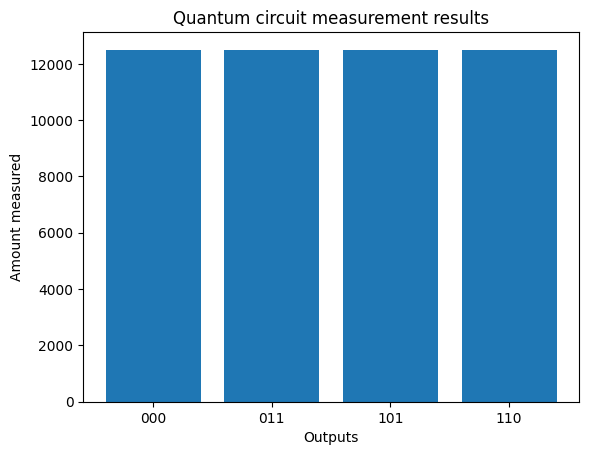

In [191]:
# Solution

import qiskit
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    counts = 0 #^ i would have like to use a different simulator, but i just cant get qiskit figured out
    for i in RR: #qiskit is a bit of a mess, especially with half of the documentation being outdated
        for z in range(len(i)):
            if counts == 0:
                counts = [[i[z][0]],[i[z][1]]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(i[z][1])
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

QQ = qiskit.QuantumCircuit(3)
QQ.h(0)
QQ.h(1)
QQ.cx(0,2)
QQ.cx(1,2)
print(qiskit.quantum_info.Statevector(QQ))
print(QQ)

res = RunSim(QQ, 50000)
print(res)

PL.bar(res[0], res[1])
PL.ylabel("Amount measured")
PL.xlabel('Outputs')
PL.title("Quantum circuit measurement results")
PL.show()

## Question 9

At this point you should be aware that n-qubits system $\rightarrow 2^{n}$ distinguishable states. In the previous exercise (`Question 8`) you had a 3-qubits system, hence you should have expected 8 distinguishable states yet there are only 4.

Considering the obtained results (4 distinguishable states if you previous solution is correct), explain how can you use them to back up the claim: `"State collapsed to the given parity measurement!"` presented during the lecture. The answer to this question does not require a python code. You just have to analyze the results and provide an answer.

### Write down your answer here

yes it does show parity, due to it being 1 when uneven and 0 when even. so it shows when there is parity on the non collapsed qbits.

## Question 10

During the lecture: "Fundamentals: A Multi-Qubit World (2)", I introduced the Quantum Teleportation algorithm.

1. Implement, simulate and draw the teleportation quantum circuit.
2. Show the initial and the resulting vector state (you can use the Bloch sphere).
3. Explain how do you recognize that the algorithm works.

![Question10](img/qci_a5_question10.png)

NB: In order to better show the result of your algorithm, you should initialize your quantum circuit to a random or predefined vector state. You could use the `circuit.initialize()` command to perform such task.

Statevector([ 0.35355339+0.j,  0.35355339+0.j, -0.35355339+0.j,
              0.35355339+0.j, -0.35355339+0.j,  0.35355339+0.j,
              0.35355339+0.j,  0.35355339+0.j],
            dims=(2, 2, 2))
        ┌───────────────────────────────────────────┐               ┌───┐ ░ ┌─┐»
   q_0: ┤0                                          ├────────────■──┤ H ├─░─┤M├»
        │                                           │┌───┐     ┌─┴─┐└───┘ ░ └╥┘»
   q_1: ┤1 Initialize(0.70711,-0.70711,0,0,0,0,0,0) ├┤ H ├──■──┤ X ├──────░──╫─»
        │                                           │└───┘┌─┴─┐└───┘      ░  ║ »
   q_2: ┤2                                          ├─────┤ X ├───────────░──╫─»
        └───────────────────────────────────────────┘     └───┘           ░  ║ »
meas: 3/═════════════════════════════════════════════════════════════════════╩═»
                                                                             0 »
«              
«   q_0: ──────
«        ┌─┐   
«   q_1: ┤M├───
«  

AttributeError: 'NoneType' object has no attribute 'iter_bezier'

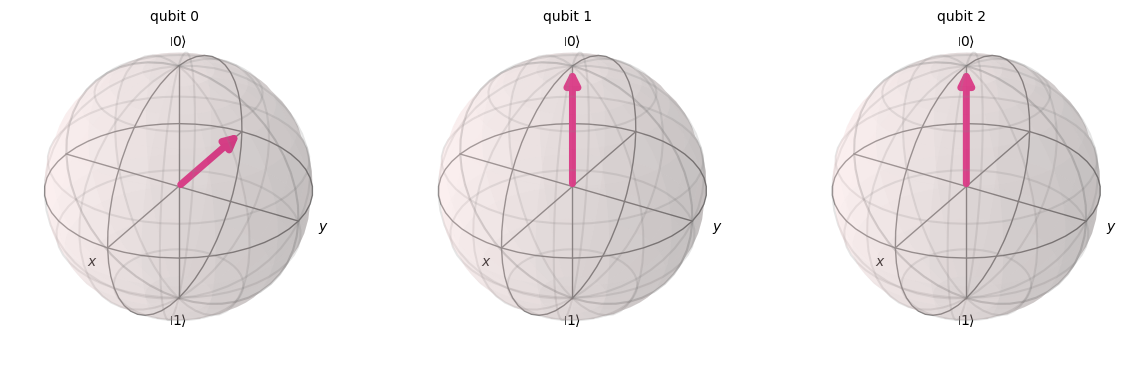

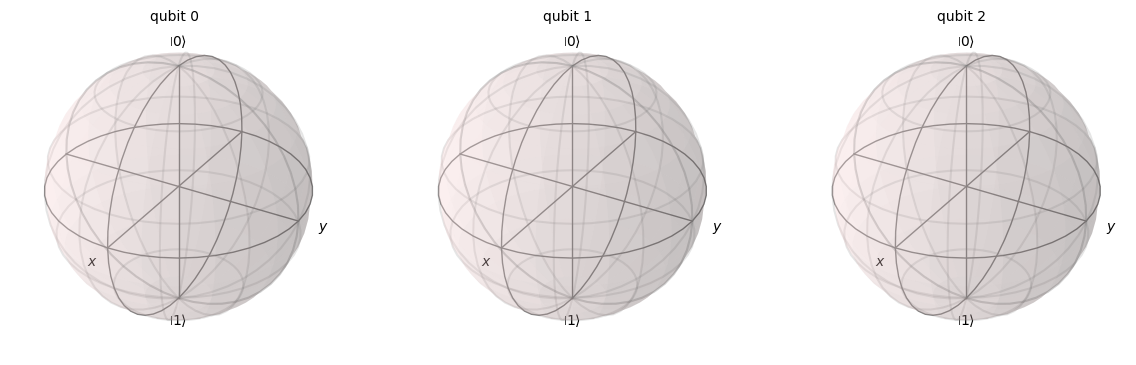

In [4]:
# Solution
import qiskit
from qiskit.quantum_info import Statevector
from qiskit_aer import StatevectorSimulator
import matplotlib.pyplot as PL
import math

def RunSim(cir, trials):
    RR = [list(StatevectorSimulator().run(circuits=cir).result().get_counts().items()) for i in range(trials)]
    counts = 0 #^ i would have like to use a different simulator, but i just cant get qiskit figured out
    for i in RR: #qiskit is a bit of a mess, especially with half of the documentation being outdated
        for z in range(len(i)):
            if counts == 0:
                counts = [[i[z][0]],[i[z][1]]]
                continue
            if not counts[0].__contains__(i[z][0]):
                counts[0].append(i[z][0])
                counts[1].append(i[z][1])
            else:
                index = counts[0].index(i[z][0])
                counts[1][index] += i[z][1]
    return counts

QQ = qiskit.QuantumCircuit(3)
QQ.initialize([1/math.sqrt(2),-1/math.sqrt(2),0,0,0,0,0,0])
PL.figure(Statevector(QQ).draw(output="bloch"))
QQ.h(1)
QQ.cx(1,2)
QQ.cx(0,1)
QQ.h(0)
PL.figure(Statevector(QQ).draw(output="bloch")) #this will show all 3, but we only care about 2
print(qiskit.quantum_info.Statevector(QQ))

QQ.measure_all()
print(QQ)

res = RunSim(QQ, 500)
print(res)

PL.bar(res[0], res[1])
PL.ylabel("Amount measured")
PL.xlabel('Outputs')
PL.title("Quantum circuit measurement results")
PL.show()
